In [79]:
import src.turing_causal_impact.queries_sales as queries_sales
import src.turing_causal_impact.causal_inference as causal_inference
# import causal_inference

import importlib
import pandas as pd
import seaborn as sns
import os
import datetime as dt
import numpy as np
import json

In [133]:
# scenarios_files = ['./scenarios/Genmed/BRAZIL/brazil_puran.json']
scenarios_files = ['./scenarios/Genmed/FRANCE/france_toujeo.json']
scenarios_files = ['./scenarios/Genmed/FRANCE/france_toujeo_front_runners.json']
# scenarios_files = ['./scenarios/Genmed/GERMANY/germany_toujeo.json']
# scenarios_files = ['./scenarios/Genmed/SPAIN/spain_toujeo.json']
# scenarios_files = ['./scenarios/Genmed/JAPAN/japan_toujeo.json']

In [134]:

scenarios = []
# with open("scenarios/us_multaq.json") as f:
#     scenarios.append(json.loads(f.read()))
# with open("scenarios/us_multaq_2.json") as f:
#     scenarios.append(json.loads(f.read()))
for s_file in scenarios_files:
    with open(s_file) as f:
        scenarios.append(json.loads(f.read()))

In [135]:
scenarios

[{'name': 'brazil-puran',
  'country': 'BRAZIL',
  'brands': ['LEVOID', 'SYNTHROID', 'LEVOTIROXINA', 'PURAN T-4', 'EUTHYROX'],
  'target_brand': 'PURAN T-4',
  'metric': 'SUM(QUANTITY_SOLD)',
  'cutover': '2023-11-01',
  'frequency': 'monthly'}]

# Get data

In [136]:
queries_sales = importlib.reload(queries_sales)

In [137]:
# queries_sales.get_all_sales_data([{'country':'BRAZIL', 'brands':['%PURAN%']}, {'country':'US', 'brands':['%PURAN%']}], '2024-01-01')
queries_sales.get_all_sales_data(scenarios, '2023-01-01')

amer False emea True
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://login.microsoftonline.com/aca3c8d6-aa71-4e1a-a10e-03572fc58c0b/saml2?SAMLRequest=lVJdb%2BIwEPwrke85iZPwVQuoaFEPKu4aAaW9ezkZewO%2BJnawnYb%2B%2B3MCSL2HVuqbP2Z2Znd2eH0scu8VtBFKjlAUYOSBZIoLuRuhx%2FWdP0CesVRymisJI%2FQGBl2Ph4YWeUkmld3LJRwqMNZzhaQhzccIVVoSRY0wRNICDLGMrCY%2FFiQOMKHGgLZODp0p3Aintbe2JGFY13VQJ4HSuzDGGIf4KnSoBvINvZMoP9cotbKKqfxCObqePpCIQtxpJBzCKaRn4o2QpxF8prI9gQyZrdepnz6s1sibXLq7VdJUBegV6FfB4HG5OBkwzoGhUmXChwLoH6aKIjBS1VlOX8Ddysq6ooE7hRnwMFc74UY1n45Q%2BSL4MV1a%2Fndv51UxnfHqV7p5%2BN6Nb%2FDTdib7V4fnJ7uR5f39YaEwQ97mEmzcBDs3poK5bOK07gnHHR%2F3%2FChe4z5JuiSJgl6S%2FEbe1MUpJLUt8%2BK59REUgmllVGaVzIWE1iVlNGED3vMp7Ud%2BByLq0wiDj5NuP85Yd8DwNmxCi9FpcUhrRI%2B%2FOI5h%2BJ58XsGfLpX5NFW5YG%2FendIFtR%2BHFgVR%2ByK4n7VQAgUV%2BYR

# Causal impact


## installation if need be

In [125]:
causal_inference = importlib.reload(causal_inference)

Scenario: brazil-puran
###############################



['2022-05-01', '2023-11-01'] ['2023-12-01', '2024-04-01']



/Users/I0517417/Documents/analyses/oneai-com-turing-causal_inference/.env/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/I0517417/Documents/analyses/oneai-com-turing-causal_inference/.env/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


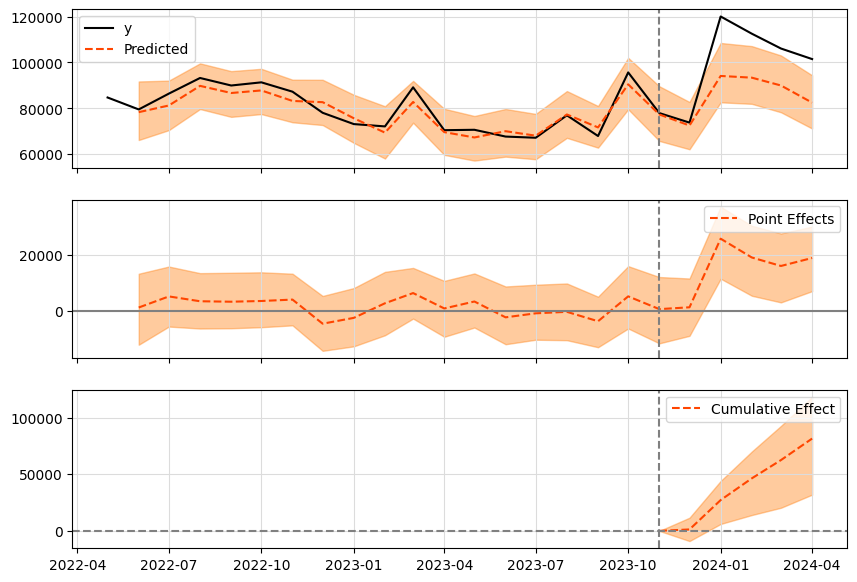

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    102756.4           513782.0
Prediction (s.d.)         86468.11 (4310.06) 432340.56 (21550.29)
95% CI                    [79260.72, 96155.85][396303.61, 480779.24]

Absolute effect (s.d.)    16288.29 (4310.06) 81441.44 (21550.29)
95% CI                    [6600.55, 23495.68][33002.76, 117478.39]

Relative effect (s.d.)    18.84% (4.98%)     18.84% (4.98%)
95% CI                    [7.63%, 27.17%]    [7.63%, 27.17%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [139]:
for scenario in scenarios:
    print(f"Scenario: {scenario['name']}")
    print("###############################")
    print()

    #load data
    df = pd.read_parquet(f"data/{scenario['name']}.parquet")
    # {'fit_method': 'hmc'}
    impact = causal_inference.provide_analyse(scenario, df, model_args={'fit_method': 'hmc'})
    
    impact.plot()
    print(impact.summary())

In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 9119.0. In the absence of an
intervention, we would have expected an average response of 9266.08.
The 95% interval of this counterfactual prediction is [9063.62, 9445.84].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -147.08 with a 95% interval of
[-326.84, 55.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 182380.0.
Had the intervention not taken place, we would have expected
a sum of 185321.52. The 95% interval of this prediction is [181272.36, 188916.71].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

NameError: name 'data' is not defined